<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Decision Tree

In [110]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [79]:
#Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')
#df = np.load(file='exchange/hr_06_premodel.npy')

In [93]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Decision Tree

In [111]:
#Decision Tree initialisieren
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [112]:
clf.score(X_test_scaled, y_test)

0.97958333333333336

In [113]:
clf_predictions = clf.predict(X_test_scaled)

In [114]:
print(confusion_matrix(y_test, clf_predictions))

[[1818   29]
 [  20  533]]


In [115]:
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1847
          1       0.95      0.96      0.96       553

avg / total       0.98      0.98      0.98      2400



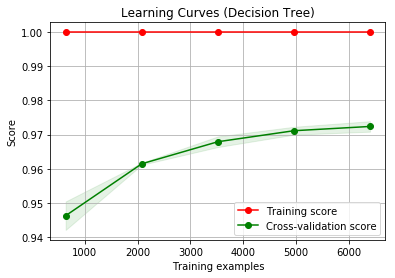

In [120]:
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

#### Graphische Darstellung des Entscheidungsbaums

In [33]:
# Install graphviz on MacOS: http://macappstore.org/graphviz/
!pip install graphviz
import graphviz

In [34]:
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')


In [35]:
graph = graphviz.Source('temp/tree.dot')


In [36]:
! pip install pydotplus

In [37]:
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image


In [38]:
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree.png");
print("Decision Tree Graph:")

Decision Tree Graph:


<img src='temp/my_tree.png' width="100%" align="center" />

### Use Decision Tree w/o department

In [122]:
#Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')
#df = np.load(file='exchange/hr_06_premodel.npy')

In [130]:
#Decision Tree initialisieren
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [131]:
clf.score(X_test_scaled, y_test)

0.98124999999999996

In [125]:
clf_predictions = clf.predict(X_test_scaled)

In [126]:
cm = confusion_matrix(y_test, clf_predictions)
print(cm)

[[1820   27]
 [  18  535]]


In [127]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1819,   28],
       [  20,  533]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1813,   34],
       [  21,  532]]), 'label': 'Nearest Neighbor'}}


In [128]:
cm_dict.item().update({'decision_tree':{'cm': cm, 'label': 'Decision Tree' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1813,   34],
       [  21,  532]]), 'label': 'Nearest Neighbor'}}


In [129]:
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1847
          1       0.95      0.97      0.96       553

avg / total       0.98      0.98      0.98      2400



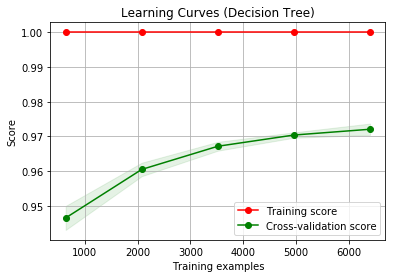

In [132]:
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

#### Graphische Darstellung des Entscheidungsbaums

In [50]:
# Install graphviz on MacOS: http://macappstore.org/graphviz/
!pip install graphviz
import graphviz

In [51]:
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')


In [52]:
graph = graphviz.Source('temp/tree.dot')


In [54]:
! pip install pydotplus

In [55]:
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image


In [56]:
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree_wodept.png");
print("Decision Tree Graph:")

Decision Tree Graph:


<img src='temp/my_tree_wodept.png' width="100%" align="center" />